## Carlifornia House Price ML Modelling

- We have been given a data set for the Carlifornia state
- We are required to predict the median housing price in a block/district given some features
- We start by importing the required packages and data

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras


## Train Test Splitting & Scaling

In [16]:

housing = fetch_california_housing()

xTrain0, xTest, yTrain0, yTest = train_test_split(housing.data, housing.target)

xTrain, xValid, yTrain, yVali = train_test_split(xTrain0, yTrain0)

In [17]:
#Define a scaler for the data
scaler = StandardScaler()

# Fit and transform the xTrain data
xTrain = scaler.fit_transform(xTrain)

# Transform the Validation and test data
xTest = scaler.transform(xTest)
xValid = scaler.transform(xValid)

In [18]:
xTrain.shape

(11610, 8)

## Define a Sequential API model

In [19]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation = 'relu',
                           input_shape = xTrain.shape[1:],
                           name = 'Inputs'),
        keras.layers.Dense(10, activation = 'relu',
                           name = 'Hidden1'),
        keras.layers.Dense(1,
                           name = 'Output')
    ]
)

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputs (Dense)                  │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model:

In [20]:
model.compile(loss='mean_squared_error',
              optimizer = 'sgd')

## Train the model:

In [27]:
history = model.fit(xTrain, yTrain,
          epochs = 20,
          validation_data = (xValid, yVali))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3473 - val_loss: 0.3198
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3258 - val_loss: 0.3218
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3332 - val_loss: 0.3425
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3313 - val_loss: 0.3166
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3385 - val_loss: 0.3175
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3260 - val_loss: 0.3155
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3110 - val_loss: 0.3145
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3269 - val_loss: 0.3139
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3183 - val_loss: 0.3111
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3103 - val_loss: 0.3223
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3173 - val_loss: 0.3260
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## Testing the model:

<Axes: >

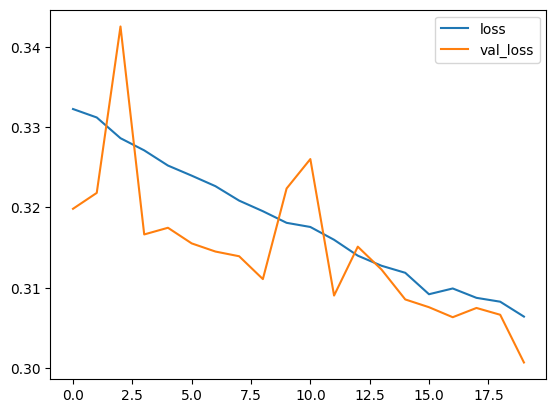

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.3374


0.3253723978996277

## Wide & Deep Neural Network

- To preserve some simple patterns one can connect inputs directly o the output
- This approach is known as the *Functional API* 


In [24]:
input_ = keras.layers.Input(shape=xTrain.shape[1:],
                             name = 'InputFunc')
hidden1 = keras.layers.Dense(30, 
                             activation='relu',
                             name = 'Hidden1Func'
                             )(input_)
hidden2 = keras.layers.Dense(10, 
                             activation='relu',
                             name = 'Hidden2Func'
                             )(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat
                             #name = 'OutputFunc'
                             )

model2 = keras.Model(inputs = [input_], 
                     outputs = [output])

model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ InputFunc           │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hidden1Func (Dense) │ (None, 30)        │        270 │ InputFunc[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hidden2Func (Dense) │ (None, 10)        │        310 │ Hidden1Func[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 18)        │          0 │ InputFunc[0][0],  │
│ (Concatenate)       │                   │            │ Hidden2Func[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         19 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 599 (2.34 KB)

 Trainable params: 599 (2.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4097 - val_loss: 2.1752
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.7633 - val_loss: 2.2203
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6555 - val_loss: 32.2715
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.8974 - val_loss: 24.4387
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9984 - val_loss: 4.7567
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2120 - val_loss: 5.2718
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49254526036738048.0000 - val_loss: 1089579515904000.0000
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 611948819382272.0000 - val_loss: 21408807649280.0000
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 649169731584.0000 - val_loss: 6314407231488.0000
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 773964759040.0000 - val_loss: 1296787177472.0000
Epoch 11/20
363/363 ━━━━━━━━━

<Axes: >

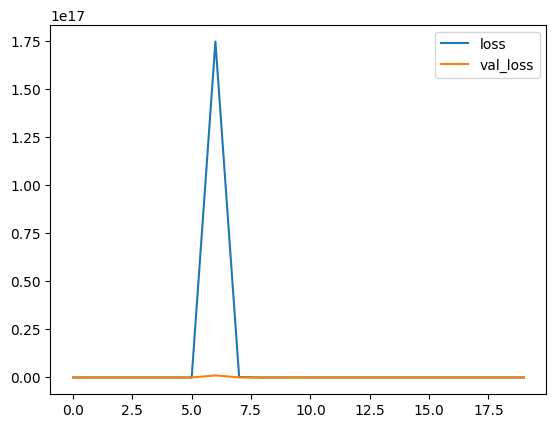

In [25]:
model2.compile(loss='mean_squared_error',
              optimizer = 'sgd')
history2 = model2.fit(xTrain, yTrain,
          epochs = 20,
          validation_data = (xValid, yVali),
          verbose = True)
pd.DataFrame(history2.history).plot()

In [26]:
model2.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 385081632.0000


421893600.0

## Functional API with Call Backs



In [31]:
input_ = keras.layers.Input(shape=xTrain.shape[1:],
                             name = 'InputFunc')
hidden1 = keras.layers.Dense(30, 
                             activation='relu',
                             name = 'Hidden1Func'
                             )(input_)
hidden2 = keras.layers.Dense(10, 
                             activation='relu',
                             name = 'Hidden2Func'
                             )(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat
                             #name = 'OutputFunc'
                             )

model2 = keras.Model(inputs = [input_], 
                     outputs = [output])

model2.compile(loss='mean_squared_error',
              optimizer = 'sgd')

checkPoint = keras.callbacks.ModelCheckpoint("SavedModels/02ModelCheckPoint.keras",
                                             save_best_only = True)

history3 = model2.fit(xTrain, yTrain,
          epochs = 20,
          validation_data = (xValid, yVali),
          verbose = True,
          callbacks=[checkPoint])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5690 - val_loss: 64.3206
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5196 - val_loss: 63.7024
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1173 - val_loss: 48.2962
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.1560 - val_loss: 15.6225
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7993 - val_loss: 491.1631
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 237.1050 - val_loss: 14105.3086
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 811.8514 - val_loss: 2684.9387
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61.2902 - val_loss: 491.7443
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 146.2968 - val_loss: 105.0156
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7231 - val_loss: 11.8973
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6878 - val_loss: 5.0059
Epoch 12/20
363/363 ━━━━━━

<Axes: >

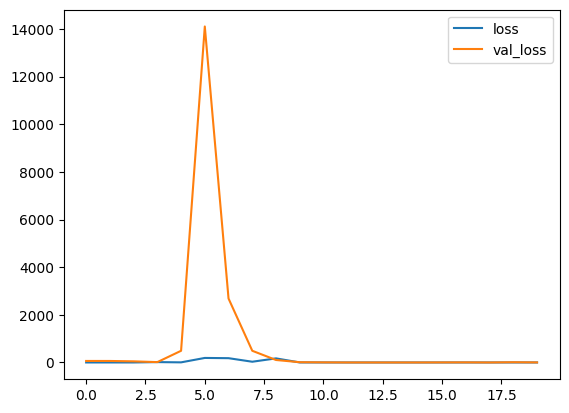

In [32]:
pd.DataFrame(history3.history).plot()

In [33]:
model2.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.6852


0.8603449463844299

In [34]:
input_ = keras.layers.Input(shape=xTrain.shape[1:],
                             name = 'InputFunc')
hidden1 = keras.layers.Dense(30, 
                             activation='relu',
                             name = 'Hidden1Func'
                             )(input_)
hidden2 = keras.layers.Dense(10, 
                             activation='relu',
                             name = 'Hidden2Func'
                             )(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat
                             #name = 'OutputFunc'
                             )

model3 = keras.Model(inputs = [input_], 
                     outputs = [output])

model3.compile(loss='mean_squared_error',
              optimizer = 'sgd')

checkPoint = keras.callbacks.ModelCheckpoint("SavedModels/02Model3CheckPoint.keras",
                                             save_best_only = True)
earlyStop = keras.callbacks.EarlyStopping(patience = 10,
                                          restore_best_weights = True)

history3 = model3.fit(xTrain, yTrain,
          epochs = 50,
          validation_data = (xValid, yVali),
          verbose = True,
          callbacks=[checkPoint, earlyStop])

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7235 - val_loss: 39.8846
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57.5282 - val_loss: 32225.9121
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 218.6768 - val_loss: 7140.3833
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 231.4821 - val_loss: 1519.9219
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73.9717 - val_loss: 618.9625
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.0007 - val_loss: 158.6824
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.1493 - val_loss: 38.0732
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5398 - val_loss: 13.5815
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3287 - val_loss: 3.6266
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6734 - val_loss: 3.2580
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7088 - val_loss: 0.9094
Epoch 12/50
363/363 ━━━━━━━

<Axes: >

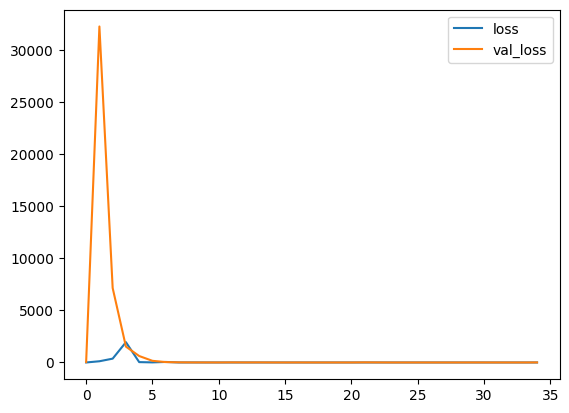

In [35]:
pd.DataFrame(history3.history).plot()

In [36]:
model3.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5450  


0.5373203158378601